In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bf_train = pd.read_csv(r'E:\Exploratory Data Analysis\black_friday\train.csv')
bf_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bf_test = pd.read_csv(r'E:\Exploratory Data Analysis\black_friday\test.csv')
bf_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
bf_df = pd.concat([bf_train, bf_test])
bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
bf_df.shape 

(783667, 12)

In [7]:
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
bf_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [9]:
bf_df.drop(['User_ID'],axis=1, inplace=True)

In [10]:
bf_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
bf_df['Occupation'].value_counts().sort_index(axis=0, ascending=True)

0      98850
1      67687
2      37996
3      25126
4     103086
5      17373
6      29102
7      84127
8       2189
9       8929
10     18304
11     16593
12     44448
13     11053
14     38782
15     17356
16     36122
17     57418
18      9367
19     11919
20     47840
Name: Occupation, dtype: int64

In [12]:
bf_df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [13]:
bf_df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [14]:
bf_df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [15]:
bf_df['Product_Category_2'].mode()[0]

8.0

In [16]:
#replace
bf_df['Product_Category_2'] = bf_df['Product_Category_2'].fillna(bf_df['Product_Category_2'].mode()[0])
bf_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,8.0,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,8.0,NaN,7969.0


In [17]:
bf_df['Product_Category_3'].isna().sum()/len(bf_df)

0.6964807756355696

In [18]:
#replace
bf_df['Product_Category_3'] = bf_df['Product_Category_3'].fillna(bf_df['Product_Category_3'].mode()[0])
bf_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [19]:
bf_df['Stay_In_Current_City_Years'] = bf_df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Mayank\AppData\Local\Temp\ipykernel_2956\109331304.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bf_df['Stay_In_Current_City_Years'] = bf_df['Stay_In_Current_City_Years'].str.replace('+','')


In [20]:
bf_df['Stay_In_Current_City_Years'] = bf_df['Stay_In_Current_City_Years'].astype(int)

In [21]:
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 68.8+ MB


In [22]:
bf_df.groupby('Gender').Age.value_counts()

# sns.barplot(x='Gender', y=bf_df['Purchase'])

Gender  Age  
F       26-35     72430
        36-45     38861
        18-25     35067
        46-50     18745
        51-55     14142
        55+        7241
        0-17       7150
M       26-35    240585
        36-45    117863
        18-25    106886
        46-50     46533
        51-55     40642
        55+       23338
        0-17      14184
Name: Age, dtype: int64

<AxesSubplot:>

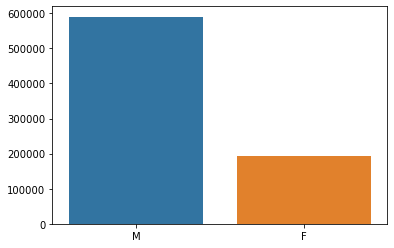

In [23]:
# sns.barplot(x=bf_df['Gender'].index, y=bf_df['Gender'].value_counts().values)
gender_df = bf_df['Gender'].value_counts()
sns.barplot(x=gender_df.index, y=gender_df.values)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

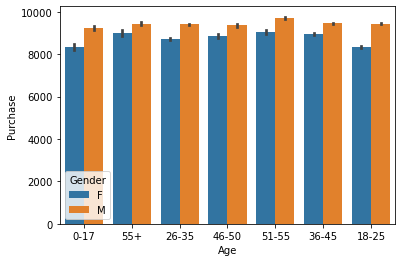

In [24]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=bf_df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

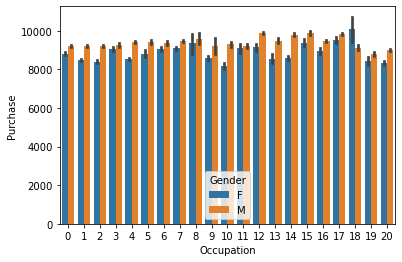

In [26]:
#purchasing of men is high then women
sns.barplot(x='Occupation',y='Purchase', hue='Gender', data=bf_df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

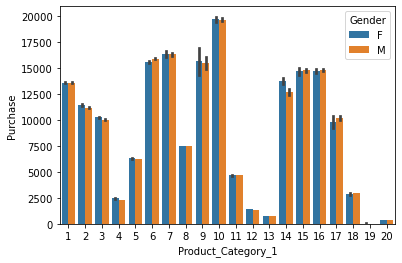

In [27]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=bf_df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

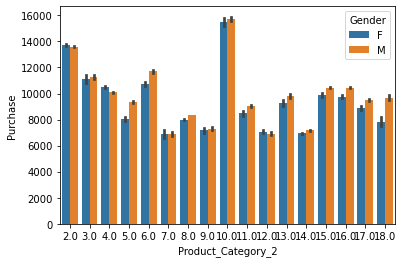

In [29]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender', data=bf_df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

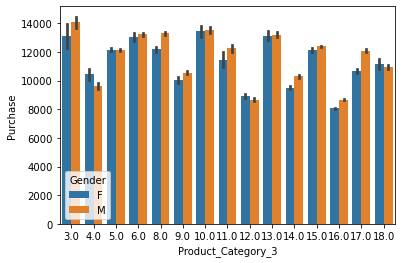

In [30]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender', data=bf_df)